## 4장 요약 - 지역 특징 검출

### ex) 대응점 찾기 문제.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/correspondence.PNG" width="600" height="750">
파노라마 영상을 만드려면 두 영상에서 서로 대응하는 점을 찾아야 한다.

3단계를 거쳐서 찾을 수 있다.
- 검출 detection (4장) : 특징점의 위치를 알아내는 단계
- 기술 describe (6장) : 특징점의 주변을 보고 속성을 알아내는 단계
- 매칭 matching (7장) : 특징점 중 대응점을 찾는 방법.

----

### 지역 특징(local feature)

1. 영상의 다른 곳과 두드러지게 달라서 풍부한 정보를 추출 할 수 있는 '특징점' 이 local feature 다.

    또한, 다른 영상에서도 반복적으로 검출되어야 한다.이를 물리적인 코너 검출이라고도 한다.
    
    -

2. edge map에는 edge강도와 edge방향 뿐이라 매칭될 만큼 풍부하지 않다.

    그래서 local feature는 명암영상에서 직접 추출한다.
    
    -
    
3. 지역 특징은 <위치, 스케일, 방향, 특징벡터>로 이루어짐.

    검출 단계에서 <위치, 스케일>을 알아내고,
    
    기술 단계에서 <방향, 특징벡터>를 알아내야한다.
    
    이때, 특징벡터가 스케일,방향에 불변(invariant)해야한다. matching시에 특징벡터를 이용하기 때문.


----
### 검출의 원리
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/local_feature.PNG" width="600" height="750">

a 처럼 여러 방향으로 밝기 변화가 발생하면, 다른영상에서도 찾기가 쉽다.

----
## 1. 이동과 회전에 불변한 특징점 검출


### 1-1. 모라벡 알고리즘 (Moravec80)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moravec.PNG" width="150" height="150">

a와 같이 여러방향 밝기 변화가 생긴다면, 높은 값을 부여하는 함수를 제시.

---

#### 제곱차의합 (SSD sum of squared difference)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/ssd1.PNG" width="450" height="400">

- w : 박스 마스크로, 특징점 주변만 계산에 참여하기 위한것.

- f : 입력영상.

f(y+v,x+u) 특징점 주변에서, 특정 방향으로 shift 시켰을때 영상

특징점 주변과 바깥의 차이를 계산한것.

각 a,b,c점에서 S(-1,-1)~ S(1,1)까지 다 계산 했을 경우.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/S_map.PNG" width="400" height="400">


---

#### S맵으로, 특징 가능성 계산.

앞으로, ( C : 특징 가능성 )이다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moravec_function.PNG" width="450" height="450">

모라벡은, 동서남북 4방향 모두 변화가 일어나야 특징점이라 봤다. 그래서 최솟값으로 계산.

하지만, 현실 세계의 잡음 처리 . 동서남북 4방향 충분한가? 대각선 방향의 변화를 알 수 없다.


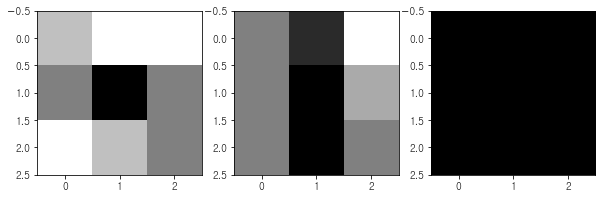

In [136]:
#모라벡 알고리즘 
#위 s 맵의 이미지화
import numpy as np

img1=np.array([[3,4,4],[2,0,2],[4,3,2]])
img2=np.array([[3,1,6],[3,0,4],[3,0,3]])
img3=np.array([[0,0,0],[0,0,0],[0,0,0]])

fig =plt.figure(figsize=(10,10))

plt.subplot(231)# 3행 3열중 1번째
plt.imshow(img1,'gray')

plt.subplot(232)# 3행 3열중 1번째
plt.imshow(img2,'gray')

plt.subplot(233)# 3행 3열중 1번째
plt.imshow(img3,'gray')

plt.show()

#a가 특징점 주변과 동서남북 차이가 나고
#b는 좌우만 차이가 난다.
#c는 같다.

----
### 1-2. 해리스 코너 (Harris corner) [Harris88]

1차 미분을 이용해, 여러 방향 반영한 코너(특징점)을 찾는 방법.

#### 가중치 제곱의 합 WSSD (Weighted Sum of Squared Difference)

SSD 식에서 박스 마스크 대신, 중심에서 멀어질수록 서서히 값이 작아지는 가우시안 마스크로 대치.

이로써, 노이즈에는 대처할 수 있다.

- 가중치 제곱의 합 WSSD (Weighted Sum of Squared Difference)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_first.PNG" width="450" height="400">

하지만, 여전히 u와 v는 정수값이어야 하기에, 여러 방향의 변화를 알 수 없다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_taylor.PNG" width="550" height="500">

테일러 전개를 해주면

이제 u와 v가 f의 바깥으로 전개되어, 실수여도 된다. 여러방향의 변화를 알 수 있다.

이때 제곱식을 풀면 행렬로 변환할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_sigma.PNG" width="550" height="500">


이 연산은 컨볼루션과 같다.(???)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_result.PNG" width="550" height="500">




#### 2차 모멘트 행렬(second moment matrix)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_A.PNG" width="250" height="200">

행렬 A는 자가 공관계(auto-correlation) 행렬이라고도 한다.

행렬 A는 u와 v와 분리 됬기에, 현재 (y,x)일 때 '영상 구조'를 말해준다.

이 행렬 덕분에, S(u,v)를 구하지 않고도 특징가능성(C)을 측정할 수 있다.

특징은 det(A) = λ1 x λ2 . trace(A) = λ1+λ2 라는것.
(람다:고유값)

#### 특징 가능성 측정

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/moment_table.PNG" width="550" height="600">

고유값에 따라, 세 점의 특징을 분류 할 수 있다.
- a와 같이 고유값이 둘다 크면, 여러 방향의 변화가 있는 지점.
- b와 같이 한 고유값이 작으면, 한 방향으로만 변화가 있는 edge 화소.
- c처럼 0이면, 변화가 없는 지점.

이에 따라, harris이 특징 가능성 C를 유도 했다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_c1.PNG" width="250" height="300">

하지만, 고유값을 항상 계산하는것은 계산이 느리다.

위에서 찾았던 특징을 통해, 개선.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_c2.PNG" width="450" height="500">


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/harris_corner_deer.PNG" width="350" height="400">

C > 0.02 임계값으로 찾은것.

1. 코너들만 검출되는 것이 아니다. 눈 지점도 검출. corner가 아니라 특징점이라 해야한다.
2. 주변 지점에 특징점이 퍼져있다. 같은 특징점이 겹친다고 생각됨. localization(비최대억제)가 필요.

----
```python

cv2.cornerHarris(src,blockSize,ksize,k[,dst[,borderType]])

- src : gray Scale의 float32 타입 이미지
- blockSize : window(커널) size
- ksize : 소벨 연산시 사용되는 커널의 크기
- k : 특징 가능성 추정시 사용되는 상수. 보통 0.04로 사용

```

잎사진 : 특징점 수 38005
가우디 사진 : 특징점 수 44195


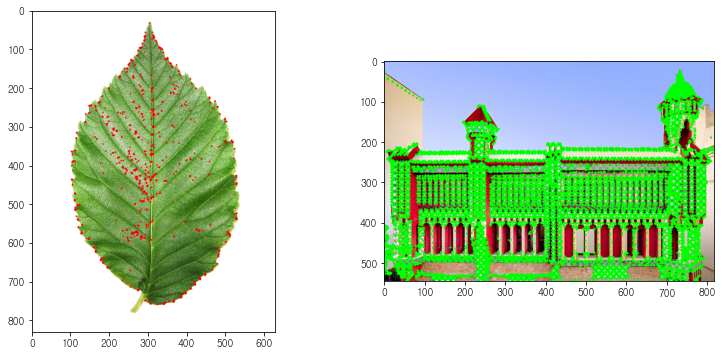

In [124]:
#ex) 해리스 코너
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("../data/leaf.png") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("../data/hough_example.jpg") # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
dst = cv2.cornerHarris(gray,3,3,0.04) #C 값을 구하는 과정

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2,3,3,0.04) #C 값을 구하는 과정


#img[dst>0.01*dst.max()] = [0,0,255] # 임계값 설정.

print("잎사진 : 특징점 수",np.sum(dst>0.01*dst.max()))
coord_y=np.where(dst>0.07*dst.max())[0]
coord_x=np.where(dst>0.07*dst.max())[1]
for x,y in zip(coord_x,coord_y):
    cv2.circle(img,(x,y), 2,(0,0,255) ,-1 ) #임계값 설정 및 표시 (c가 0.07*최대값보다 커야지 특징점)




print("가우디 사진 : 특징점 수",np.sum(dst2>0.01*dst2.max()))
coord_y=np.where(dst2>0.01*dst2.max())[0]
coord_x=np.where(dst2>0.01*dst2.max())[1]
for x,y in zip(coord_x,coord_y):
    cv2.circle(img2,(x,y), 2,(0,255,0) ,-1 ) #임계값 설정 및 표시 (c가 0.01*최대값보다 커야지 특징점)
#img[img==[0,0,0]] = [255,0,0]

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#PLOT 출력위해
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#PLOT 출력위해

fig =plt.figure(figsize=(13,13))

plt.subplot(221)# 3행 3열중 1번째
plt.imshow(img)

plt.subplot(222)# 3행 3열중 1번째
plt.imshow(img2)

plt.show()

----
### 1-3. 2차 미분을 사용하는 방법

앞에서는 1차 도함수와 2차 모멘트 행렬 이용.

해시안 행렬(hessian matrix)를 이용해서 검출.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian.PNG" width="250" height="300">


잡음 증폭 되기에, 가우시안 스무딩후, 2차 미분.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian_gaussian.PNG" width="450" height="500">

이 방법은 c를 구하는 방법이 두가지다.

행렬식과 trace( 이때는 LOG와 같은 값) 를 통해서 특징 가능성 값을 구할 수도 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/hessian_c.PNG" width="450" height="500">

하지만, 에지가 민감하게 검출됨.

---
### 1-4. 슈산 (SUSAN) (Smallest Univalue Segment Assimilating)

이 방법은 미분을 사용하지 않는다. 

현재 처리중인 중심점과 인근 지역이 밝기 값이 얼마나 유사한가를 따져보고 그 결과에 따라 특징 가능성을 측정.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/susan.PNG" width="200" height="200">

#### 우산 USAN(Univalue Segment Assimilating Nucleus)
중심점과 주변영역이 명암값이 유사한 정도.

c의 우산 비율 : 100%

b의 우산 비율 : 50% -> 에지 검출

a의 우산 비율 : 50% 이하 -> 특징점 검출.;


#### 우산 비율 측정과 특징가능성 계산

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_area.PNG" width="300" height="300">

r: 원형 마스크내 화소

r0: 중심점

r화소 r0 화소의 차이가 임계값 t1보다 작으면 넓이로 계산.


usan_area를 특징 가능성으로 변환.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_c.PNG" width="300" height="300">

q: 원형 마스크의 넓이* 0.75이다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina3/resource/usan_circle.PNG" width="300" height="300">

